# Elasticidad Lineal en FEniCS 3D.

<img src="https://github.com/ccdonoso/Intro2_Computational_Mechanics/blob/master/img/logo_usach_dimec.png?raw=true" alt="logo" width="300"/>

- Autor: Claudio Canales Donoso
- Página: [ccdonoso.github.io](https://ccdonoso.github.io/)
- Cursos: Mecánica Computacional - Diseño Computarizado
- Universidad de Santiago de Chile
- Fecha: 05/03/24

License: BSD 3 clause

**Contenido**
- Elementos finitos
    1. Ecuaciones de elasticidad lineal.
    2. Formulación variacional.
    3. Problema.
    4. Resolución con FEniCS.

## Las ecuaciones de elasticidad lineal.

La elasticidad lineal es el estudio de cómo los objetos sólidos se deforman y se someten a tensiones internas debido a condiciones de carga prescritas.

Es un problema importante en la ingeniería moderna. Su correspondiente EDP es una generalización de la ecuación de Poisson, y es una de las EDP más populares en ingeniería.

Ahora estudiamos su formulación variacional y cómo resolver este problema utilizando FEniCS en 2D y 3D.

## Problema PDE

La ecuación que rige las deformaciones elásticas de un cuerpo $\Omega$ puede escribirse como

\begin{equation}
\tag{1}
-\boldsymbol{\nabla}\cdot\boldsymbol{\sigma} = \boldsymbol{f}\hbox{ in }\Omega,
\end{equation}

donde $\boldsymbol{\sigma}$ es el *tensor de tensiones*, y $\boldsymbol{f}$ es la *fuerza del cuerpo por unidad de
unidad*. Para materiales isótropos, el tensor de tensión se relaciona además con la deformación por
las dos ecuaciones siguientes:
\begin{align}
\boldsymbol{\sigma} &= \lambda\,\hbox{tr}\,(\boldsymbol{\varepsilon}) \boldsymbol{I} + 2\mu\boldsymbol{\varepsilon},
\tag{2}\\
\boldsymbol{\varepsilon} &= \frac{1}{2}\left(\boldsymbol{\nabla} \boldsymbol{u} + (\boldsymbol{\nabla} \boldsymbol{u})^{\top}\right),
\tag{3}
\end{align}
donde $\boldsymbol{\varepsilon}$ es el *tensor de deformación simétrica* (gradiente simétrico),
y $\boldsymbol{u}$ es el *campo vectorial de desplazamiento*, $\boldsymbol{I}$ denota el *tensor de identidad*,
$\mathrm{tr}$ denota el *operador traza* en un tensor, y $\lambda$ y $\mu$
son propiedades del material conocidas como *parámetros de elasticidad de Lamé*.


Combinamos las ecuaciones (2) y (3) para obtener:
\begin{equation}
\tag{4}
\boldsymbol{\boldsymbol{\sigma}} = \lambda(\boldsymbol{\nabla}\cdot \boldsymbol{u})\boldsymbol{I} + \mu(\boldsymbol{\nabla} \boldsymbol{u} + (\boldsymbol{\nabla} \boldsymbol{u})^{\top})
\end{equation}

Tenga en cuenta que
(1)--(3)
pueden transformarse fácilmente en una EDP de un solo vector para $\boldsymbol{u}$, que es la
para la incógnita $\boldsymbol{u}$ (ecuación de Navier).  En la
En la derivación de la formulación variacional, sin embargo, es conveniente
mantener las ecuaciones divididas como arriba.

## Formulación variacional.

La formulación variacional de (1)-(3) consiste en formar el producto interior de
(1) y una función de prueba *vectorial* en $\hat{V}$, donde $\hat{V}$ es un espacio de funciones vectoriales de prueba, e integrando sobre el dominio $\Omega$:

\begin{equation} -\int_\Omega (\boldsymbol{\nabla}\cdot\boldsymbol{\sigma}) \cdot \boldsymbol{v}\ \mathrm{d}\boldsymbol{x} =
\int_\Omega \boldsymbol{f}\cdot \boldsymbol{v}\ \mathrm{d}\boldsymbol{x},\tag{5}
\end{equation}
where $\mathrm{d}\boldsymbol{x}$ denotes the volume measure.

Dado que $\boldsymbol{\nabla}\cdot\boldsymbol{\sigma}$ contiene derivadas de segundo orden de la incógnita primaria
desconocido $\boldsymbol{u}$, integramos este término por partes:

\begin{equation}
-\int_\Omega (\boldsymbol{\nabla}\cdot\boldsymbol{\sigma}) \cdot \boldsymbol{v} \ \mathrm{d}\boldsymbol{x}
= \int_\Omega \boldsymbol{\sigma} : \boldsymbol{\nabla} \boldsymbol{v} \ \mathrm{d}\boldsymbol{x} - \int_{\partial\Omega}
(\boldsymbol{\sigma}\cdot \boldsymbol{n})\cdot \boldsymbol{v} \ \mathrm{d}\boldsymbol{s},
\tag{6}
\end{equation}

donde el operador dos puntos es el producto interior entre tensores (suma
producto por pares de todos los elementos), $\boldsymbol{n}$ es la normal unitaria exterior
en el límite, y $\mathrm{d}\boldsymbol{s}$ es una medida en superficie.

La cantidad $\boldsymbol{\sigma}\cdot \boldsymbol{n}$ se conoce como la
*tracción* o vector de tensión en la frontera, y a menudo se prescribe
como condición de contorno en una parte $\partial_T\Omega$ de la frontera
como $\boldsymbol{\sigma}\cdot \boldsymbol{n} = \boldsymbol{T}$, mientras que el
parte restante de la frontera tendría el valor de los desplazamientos prescritos.

Sustituyendo (6) en (5),
obtenemos

\begin{equation}
\int_\Omega \boldsymbol{\sigma} : \boldsymbol{\nabla} \boldsymbol{v}\ \mathrm{d}\boldsymbol{x} =
\int_\Omega \boldsymbol{f}\cdot \boldsymbol{v}\ \mathrm{d}\boldsymbol{x}
+ \int_{\partial\Omega} \boldsymbol{T}\cdot \boldsymbol{v}\ \mathrm{d}\boldsymbol{s}. \tag{7}
\end{equation}


Insertando la expresión (4) para
se obtiene la forma variacional con $\boldsymbol{u}$ como incógnita.

### Imponiendo condiciones de borde

Veamos ahora cómo aplicar las condiciones de contorno.
En el caso de los límites de Dirichlet, aplicaremos las condiciones de contorno de forma estricta.
Para estos puntos, no se asocian funciones de prueba con los nodos Dirichlet.

Para las condiciones de contorno de tracción, haremos cumplir la condición de contorno
débilmente utilizando la forma variacional (8).
De forma similar a la ecuación de Poisson, requerimos sus correspondientes funciones de prueba
$\boldsymbol{v}$ desaparecen a lo largo de $\partial \Omega$ para los puntos interiores.
Entonces, la integral de frontera anterior no tiene efectos para los puntos en
$\partial\Omega\setminus\partial\Omega_T$.

## Resumen de formulación variacional

En resumen, el problema variacional consiste en encontrar $\boldsymbol{u}$ en un espacio vectorial de funciones $\hat{V}$ tal que:
\begin{equation}
a(\boldsymbol{u},\boldsymbol{v}) = L(\boldsymbol{v})\quad\forall \boldsymbol{v}\in\hat{V},\tag{10}
\end{equation}
donde
\begin{align}
a(\boldsymbol{u},\boldsymbol{v}) &= \int_\Omega\sigma(\boldsymbol{u}) :\varepsilon(\boldsymbol{v})\ \mathrm{d}\boldsymbol{x},\tag{11}\\
L(\boldsymbol{v}) &= \int_\Omega \boldsymbol{f}\cdot \boldsymbol{v}\ \mathrm{d}\boldsymbol{x} + \int_{\partial\Omega_T} \boldsymbol{T}\cdot \boldsymbol{v}\ \mathrm{d}\boldsymbol{s}\tag{12},
\end{align}
y,
\begin{equation}
\boldsymbol{\sigma}(\boldsymbol{u}) = \lambda(\boldsymbol{\nabla}\cdot \boldsymbol{u})\boldsymbol{I} + \mu(\boldsymbol{\nabla} \boldsymbol{u} + (\boldsymbol{\nabla} \boldsymbol{u})^{\top}).\tag{13}\\
\end{equation}

## Elasticidad lineal en FENICS

Para demostrar la aplicación, modelaremos una viga empotrada que se deforma bajo su propio peso en 3D. Esto se puede modelar meidnate la fuerza de cuerpo (fuerza/volumen) como $\boldsymbol{f}=(0,0,-\rho g)$ con $\rho$ la densidad de la viga y $g$ la aceleración de la gravedad. La viga tiene es de sección cuadrada con una longitud $L$ y una sección transversal cuadrada de anchura $W$. Establecemos $\boldsymbol{u}=(0,0,0)$ en el extremo empotrado, $x=0$. El resto de la frontera es
libre de tracción, es decir, fijamos $\boldsymbol{T} = 0$. Por tanto,
$$L(\boldsymbol{v}) = \int_\Omega \boldsymbol{f}\cdot \boldsymbol{v} \mathrm{d}\boldsymbol{x}$$
para este problema.

<img src="https://fenicsproject.org/pub/tutorial/html/fig/elasticity.png" width="400">

### Importación de librerias:

**Este código esta implementado para que pueda ser ejecutado en Google Colab. Esto facilitara la instalación de Fenics.**

In [ ]:
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin


# setup enviornment for interactive plotting
!apt-get install -qq xvfb
!pip install pyvista panel -q

import os
os.system('/usr/bin/Xvfb :99 -screen 0 1024x768x24 &')
os.environ['DISPLAY'] = ':99'

import panel as pn
pn.extension('vtk')

!pip install pyvista
!pip install vtk

import pyvista as pv
!pip install trame

### Creación de la malla y espacio vectorial de funciones.

Comenzamos definendo y creando la malla con Fenics. Además, se define el espacio vectorial de funciones del problema.

In [74]:
# Scaled variables
L = 1; W = 0.2
mu = 1
rho = 1
delta = W/L
gamma = 0.4*delta**2
beta = 1.25
lambda_ = beta
g = gamma

# Create mesh and define function space
mesh = BoxMesh(Point(0, 0, 0), Point(L, W, W), 10, 3, 3)
V = VectorFunctionSpace(mesh, 'P', 1)

### Definición de problema variacional.

La incógnita principal es ahora un campo vectorial $\boldsymbol{u}$ y no un campo escalar,
así que tenemos que trabajar con un espacio de función vectorial. Vamos a utilizar
funciones por partes para todos los componentes.

In [75]:
u = TrialFunction(V)
v = TestFunction(V)

Con `u = TrialFunction(V)` tenemos que `u` como un elemento finito vector-valued
con tres componentes para este problema 3D.

A continuación definimos el tensor de tensiones y $a$. Los operadores de gradiente y divergencia
tienen ahora un prefijo `nabla_`.
Esto no es estrictamente necesario en el presente problema, pero es
recomendado en general para las EDP vectoriales que surgen de la mecánica del continuo,
si se interpreta $\boldsymbol{\nabla}$ como un vector en la notación de la EDP. Véase
las notas sobre `grad(u)` vs. `nabla_grad(u)` a continuación.

In [76]:
# define stress and strain.
def epsilon(u):
    return 0.5*(nabla_grad(u) + nabla_grad(u).T)
    #return sym(nabla_grad(u))

beta = 1.25
lambda_ = beta
mu = 1
d = u.geometric_dimension()  # space dimension

def sigma(u):
    return lambda_*nabla_div(u)*Identity(d) + 2*mu*epsilon(u)

# Define a
a = inner(sigma(u), epsilon(v))*dx

Para definir $L$, $\boldsymbol{f}=(0, 0, \rho*g)$ es una constante vectorial, en lugar de un escalar.
Tal constante vectorial se especifica como `Constant(0, 0, -rho*g)` en FEniCS.

In [77]:
# Define L
rho = 1.
delta = W/L
gamma = 0.4*delta**2
g = gamma

#T = Constant((0,0,0))
f = Constant((0, 0, -rho*g))
L = dot(f, v)*dx # + dot(T, v)*ds

### Definir condiciones de contorno

Sólo especificamos la condición de contorno Dirichlet. Para la condición de contorno
$u=(0, 0, 0)$, debemos poner un valor vectorial a cero, no sólo un escalar.
Especificamos la constante vectorial como `Constant((0, 0, 0))`.

In [80]:
tol = 1E-14

def clamped_boundary(x, on_boundary):
    return on_boundary and x[0] < tol

bc = DirichletBC(V, Constant((0, 0, 0)), clamped_boundary)

### Resolver el problema variacional

Por último, podemos resolver el problema.

In [ ]:
# Compute solution
u = Function(V)
solve(a == L, u, bc)

vtkfile = File('elasticity/solutions.pvd')
vtkfile << u

## Postproceso con Pyvista.

Para postprocesar los resultados. Comenzaremos ploteando el campo de desplazamiento en PyVista. También, se presentará la malla del campo deformado.

/usr/local/lib/python3.10/dist-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/usr/local/lib/python3.10/dist-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


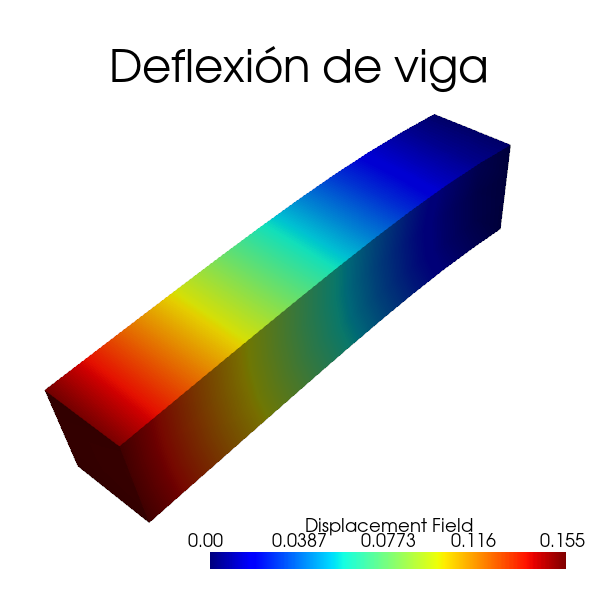

In [89]:
import pyvista as pv
import numpy as np

# Color de mapa de colores
pv.global_theme.cmap = 'jet'
pn.extension('vtk')


# Extracción de campo de interes para plottear en pyvista.
u_field = []
for c in mesh.coordinates():
    u_field.append(u(c))
u_field = np.array(u_field)


# Carga la malla. Esto no considera los campos como desplazamiento.
meshpv = pv.read('elasticity/solutions.pvd')[0]

# Se agrega la información a cada punto de la malla con la información del campo
# de desplazamiento.
meshpv.point_data["Displacement Field"] = u_field

# Se deforma la malla, de acuerdo a un factor de 1 de la solución.
meshpv = meshpv.warp_by_vector("Displacement Field", factor=1)

# Plotter.
p = pv.Plotter(notebook=True, window_size=(600, 600),shape=(1, 1))
p.add_mesh(meshpv)
p.add_title("Deflexión de viga")
p.show()

## Esfuerzo de Von-Misses.

Calcularemos el esfuerzo de Von-Misses definido como:
$$\boldsymbol{\sigma}_M = \sqrt{\frac{3}{2}\boldsymbol{s}:\boldsymbol{s}},$$
donde $\boldsymbol{s}$ es el tensor desviatorico de esfuerzo.
$$\boldsymbol{s} = \boldsymbol{\sigma} - \frac{1}{3}\mathrm{tr}\,(\boldsymbol{\sigma})\,\boldsymbol{I}.$$

Existe una correspondencia uno a uno entre estas fórmulas y el código FEniCS,
donde calculamos la variable `von_Mises` proyectándola al espacio de elementos finitos.

/usr/local/lib/python3.10/dist-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/usr/local/lib/python3.10/dist-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


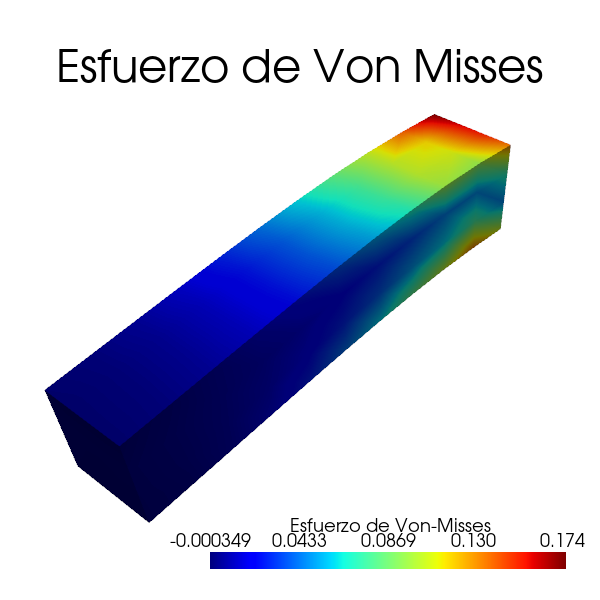

In [90]:
# Calculo de esfuerzo de Von-Misses en Fenics.
s = sigma(u) - (1./3)*tr(sigma(u))*Identity(d)  # deviatoric stress
von_Mises = sqrt(3./2*inner(s, s))
V = FunctionSpace(mesh, 'P', 1)
von_Mises = project(von_Mises, V)

# Plotteo de von_Mises en PyVista.
von_ms = []
for c in mesh.coordinates():
    von_ms.append(von_Mises(c))
von_ms = np.array(von_ms)

# Se agrega la información a cada punto de la malla con la información del campo
# (Esfuerzo de Von-Misses)
meshpv.point_data["Esfuerzo de Von-Misses"] = von_ms

# Plotter.
p = pv.Plotter(notebook=True, window_size=(600, 600),shape=(1, 1))
p.add_mesh(meshpv, scalars="Esfuerzo de Von-Misses")
p.add_title("Esfuerzo de Von Misses")
p.show()

## Nota sobre `grad(u)` vs. `nabla_grad(u)`

Para funciones escalares, $\boldsymbol{\nabla} u$ tiene un significado claro como el vector
$$\boldsymbol{\nabla} u =\left(\frac{\partial u}{\partial x}, \frac{\partial u}{\partial y},
\frac{\partial u}{\partial z}\right).$$

Sin embargo, para una función vectorial $\boldsymbol{u}$, el significado es menos claro.
Algunas fuentes definen $\boldsymbol{\nabla}\boldsymbol{u}$ como la matriz con elementos
$\partial u_j / \partial x_i$, especialmente en mecánica continua.
Algunas otras fuentes prefieren $\partial u_i / \partial x_j$, como en la
*matriz jacobiana*.

En nuestras notas, $\boldsymbol{\nabla}$ siempre denota la matriz
con elementos $\partial u_j / \partial x_i$, para ser consistentes con la mayoría de las EDP.
El operador correspondiente en FEniCS es `nabla_grad(u)`.
Para la matriz Jacobiana, su operador correspondiente en FEniCS es `grad(u)`.

### Elasticidad anisótropa
Podemos permitir fácilmente materiales anisotrópicos ya que
(9) es simplemente el producto interior de
el tensor de tensión y el tensor de deformación. La elasticidad anisotrópica es
más fácil de tratar teniendo un vector 6 con los componentes únicos de
tensión y deformación y relacionar los 6 vectores a través de un $6\times 6$
elasticidad $\boldsymbol{D}$: $\boldsymbol{\sigma} = \boldsymbol{D}\boldsymbol{\varepsilon}$. Formamos entonces el
producto interior de $\boldsymbol{\sigma}$ y $\boldsymbol{\varepsilon}$ para ser $\boldsymbol{\varepsilon}^T \boldsymbol{D}\boldsymbol{\varepsilon}$.